In [1]:
# TEED with 2 blocks
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping, Callback
import numpy as np
import matplotlib.pyplot as plt

# from model_NO_AF import model_maker
# from model_ALL_RELU import model_maker
#from model_ALL_TANH import model_maker+
# from model_ALL_MISH import model_maker
# from model_ALL_SMISH import model_maker

# from model_TEED_RELU import model_maker
# from model_TEED_TANH import model_maker
# from model_TEED_MISH import model_maker
#from model_TEED_SMISH_xx import model_maker
from model_TEED_SMISH_x import model_maker
#from model_TEED_SMISH_xi import model_maker
# from model import model_maker



print(tf.__version__)
print(keras.__version__)


2.17.0
3.5.0


In [2]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history["accuracy"]) #'acc'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Custom callback to stop training when accuracy is above 95%
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] > 0.95:
            print(f'\nReached 95% validation accuracy. Stopping training.')
            self.model.stop_training = True

In [3]:
def dataset_maker(dataset_name):
    
    if dataset_name =="mnist_fashion":
        # train 60000 test 10000
        fashion_mnist = keras.datasets.fashion_mnist
        (x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

        mean=np.mean(x_train)
        std=np.std(x_train)
        x_test=(x_test-mean)/std
        x_train=(x_train-mean)/std

        class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

        x_train = x_train.reshape((60000, 28, 28, 1))
        ##x_valid = x_valid.reshape((5000, 28, 28, 1))
        x_test = x_test.reshape((10000, 28, 28, 1))
        
        return [x_train,y_train], [x_test, y_test]
    
    elif dataset_name =="mnist":
        # train 60000 test 10000
        (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
        
        mean=np.mean(x_train)
        std=np.std(x_train)
        x_test=(x_test-mean)/std
        x_train=(x_train-mean)/std
        
        x_train = x_train.reshape((60000, 28, 28, 1))
        x_test = x_test.reshape((10000, 28, 28, 1))
        
        return [x_train,y_train], [x_test, y_test]
    
    elif dataset_name =="cifar10":
        # train 50000, 10000
        (x_full, y_full), (x_test, y_test) = keras.datasets.cifar10.load_data()
        
        x_valid, x_train = x_full[:5000] / 255.0, x_full[5000:] / 255.0
        y_valid, y_train = y_full[:5000], y_full[5000:]
        x_test = x_test / 255.0
        
        class_names = ["airplane", "automobile", "bird", "cat", "deer", 
                       "dog", "frog", "horse", "ship", "truck"]
        
        x_train = x_train.reshape((45000, 32, 32, 3))
        x_valid = x_valid.reshape((5000, 32, 32, 3))
        x_test = x_test.reshape((10000, 32, 32, 3))
        
        return [x_train,y_train], [x_valid, y_valid], [x_test, y_test]
    
    elif dataset_name =="cifar100":
        # train 50000, 10000
        (x_full, y_full), (x_test, y_test) = keras.datasets.cifar100.load_data()
        
        x_valid, x_train = x_full[:5000] / 255.0, x_full[5000:] / 255.0
        y_valid, y_train = y_full[:5000], y_full[5000:]
        x_test = x_test / 255.0
        
        class_names = ["airplane", "automobile", "bird", "cat", "deer", 
                       "dog", "frog", "horse", "ship", "truck"]
        
        x_train = x_train.reshape((45000, 32, 32, 3))
        x_valid = x_valid.reshape((5000, 32, 32, 3))
        x_test = x_test.reshape((10000, 32, 32, 3))
        
        return [x_train,y_train], [x_valid, y_valid], [x_test, y_test]
    
    else:
        
        print("Unrecognized dataset")
        


In [7]:
# print(image_size+ (1,))
dataset_name = ["mnist","mnist_fashion","cifar10", "cifar100"]
data = dataset_name[1]
if data=="cifar10" or data=="cifar100":
    image_size =(32, 32,3) 
else:
    image_size = (28, 28,1)
    
batch_size = 32
N_classes = 10 if data!="cifar100" else 100

training, testing = dataset_maker(data)
x_train, y_train = training
x_test, y_test = testing

print("Input data size", data,image_size)
print("Training:", x_train.shape, y_train.shape)
print("Testing:", x_test.shape, y_test.shape)



# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, N_classes)
y_test = keras.utils.to_categorical(y_test, N_classes)
print("Target size", data,image_size)
print("Training:", y_train.shape)
print("Testing:", y_test.shape)

model = model_maker(image_size,N_classes)
# keras.utils.plot_model(model, show_shapes=True)
model.summary()


Input data size mnist_fashion (28, 28, 1)
Training: (60000, 28, 28, 1) (60000,)
Testing: (10000, 28, 28, 1) (10000,)
Target size mnist_fashion (28, 28, 1)
Training: (60000, 10)
Testing: (10000, 10)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ k_smish_4 (k_smish)                  │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ k_smish_5 (k_smish)                  │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ k_smish_6 (k_smish)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ k_smish_7 (k_smish)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,002 (855.48 KB)

 Trainable params: 218,746 (854.48 KB)

 Non-trainable params: 256 (1.00 KB)

In [10]:
# compile the model
# model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
#               optimizer=keras.optimizers.AdamW(), 
#               metrics=[keras.metrics.SparseCategoricalAccuracy()]) # second optimizer

#model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
#              optimizer=keras.optimizers.AdamW(learning_rate=0.0001), 
#              metrics=[keras.metrics.SparseTopKCategoricalAccuracy(k=1)]) # second optimizer and accuracy
#model.compile(loss=keras.losses.CategoricalCrossentropy(), 
#              optimizer=keras.optimizers.AdamW(learning_rate=0.0001), 
#              metrics=[keras.metrics.Accuracy()]) # second optimizer and accuracy
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.AdamW(learning_rate=0.001), metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001, weight_decay=2e-4),
              metrics=["accuracy"]) # lr 8e-5
image_size

(28, 28, 1)

In [11]:
# start training
epochs = 20  # 5, 10, 15, 20
history = model.fit(x_train, y_train, epochs=epochs,
                    validation_split=0.15,batch_size=32)

Epoch 1/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7642 - loss: 0.6579 - val_accuracy: 0.8678 - val_loss: 0.3747
Epoch 2/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8617 - loss: 0.3931 - val_accuracy: 0.8751 - val_loss: 0.3364
Epoch 3/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8748 - loss: 0.3554 - val_accuracy: 0.8834 - val_loss: 0.3231
Epoch 4/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8773 - loss: 0.3430 - val_accuracy: 0.8938 - val_loss: 0.2977
Epoch 5/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8856 - loss: 0.3143 - val_accuracy: 0.8967 - val_loss: 0.2875
Epoch 6/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8860 - loss: 0.3131 - val_accuracy: 0.8934 - val_loss: 0.2853
Epoch 7/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8918 - loss: 0.3017 - val_accuracy: 0.8928 - val_loss: 0.2946
Epoch 8/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8987 - loss: 0

In [12]:
n_random = np.random.choice(len(x_test)) # choose an input data
res_acc=model.evaluate(x_test, y_test)
res_out=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9057 - loss: 0.2740
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


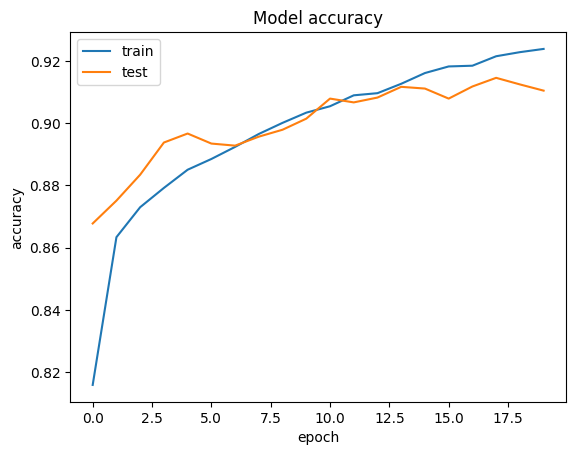

In [13]:
plothist(history)

In [18]:
def get_classified_mnist(y, y_hat, dataset="mnist_fashion"):
    print(y)
    print(y_hat)
    if dataset=="mnist_fashion":
        class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    else:
        class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    max_yh = y_hat.max()
    y_index = 0
    yh_index = 0
    for i,res in enumerate(y):
        if res>0:
            y_index=i
    y_res = "Target="+class_name[y_index]
    
    for i,res in enumerate(y_hat):
        if res==max_yh:
            yh_index=i
    #print(y_hat[yh_index])
    yh_res = "Result: "+class_name[y_index]+" prob: "+str(int(y_hat[yh_index]*100))+"%"
    
    return y_res, yh_res

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[3.8045553e-11 2.2742040e-12 5.1893302e-11 1.1328818e-09 6.7988004e-11
 9.2118629e-10 3.2901728e-09 6.4091943e-10 1.0000000e+00 3.7706460e-10]
Target=Bag
Result: Bag prob: 100%


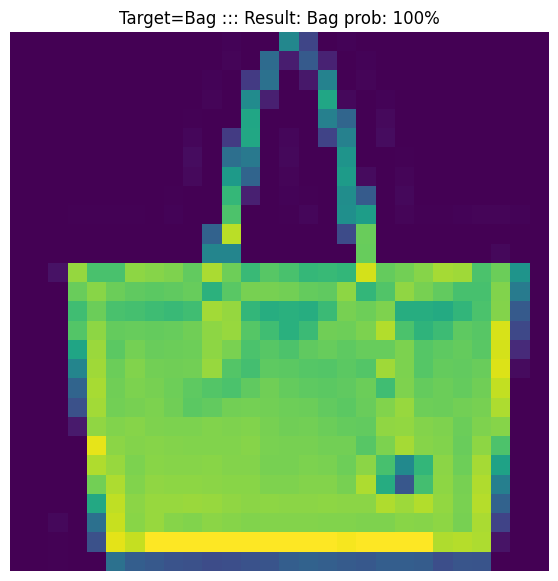

In [25]:
n_random= 7000
y, yh = get_classified_mnist(y_test[n_random],res_out[n_random], data)
print(y)
print(yh)
img_title = y+" ::: "+yh 
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(x_test[n_random])
ax.axis('off')
ax.set_title(img_title)
plt.show()